THEME : PREDICTION DES MALADIES CARDIAQUES A L'AIDE DE VARIABLES CLINIQUES

Les maladies cardiovasculaires représentent l'une des principales causes de mortalité dans le monde. Une détection précoce des patients à risque permettrait de mettre en place des traitements préventifs et de réduire la mortalité. Ce projet vise à construire un modèle prédictif permettant de détecter la présence de maladie cardiaque à partir de variables cliniques recueillies lors d'examens médicaux standards.

Description du projet 
•	Présentation du data pipeline sous forme de schéma
•	Présentation du dataSet
•	Présentation des traitements effectués sur la data
•	Pourquoi le choix d’un tel algo
•	Bonne interprétation des résultats
•	Synthèse sur le projet

Objectifs du projet
•	Comprendre et explorer les données cliniques fournies
•	Nettoyer et préparer les données pour la modélisation
•	Appliquer des modèles de machine learning pour prédire la variable cible "num"
•	Évaluer la performance des modèles avec des métriques telles courbe ROC



In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Chargement des données
import pandas as pd

file_path = "C:/Users/kapna/Documents/GitHub/projet2_maladie_cardiaque/heart_disease.csv"
df = pd.read_csv(file_path)

df.head(), df.isnull().sum()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   1       145   233    1        2      150      0      2.3      3   
 1   67    1   4       160   286    0        2      108      1      1.5      2   
 2   67    1   4       120   229    0        2      129      1      2.6      2   
 3   37    1   3       130   250    0        0      187      0      3.5      3   
 4   41    0   2       130   204    0        2      172      0      1.4      1   
 
     ca  thal  num  
 0  0.0   6.0    0  
 1  3.0   3.0    2  
 2  2.0   7.0    1  
 3  0.0   3.0    0  
 4  0.0   3.0    0  ,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          4
 thal        2
 num         0
 dtype: int64)

Le dataset contient quelques valeurs manquantes :

    ca : 4 valeurs manquantes

    thal : 2 valeurs manquantes

In [5]:
#Vérification des types de variables
print("\nTypes de variables :\n", df.dtypes)

categorical_features = ['cp', 'restecg', 'slope', 'thal']
df[categorical_features] = df[categorical_features].astype('category')


Types de variables :
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


GESTION DES VALEURS MANQUANTE

    On utilisera l'imputation de la médiane, qui consite à remplacer les valeurs manquantes d'une variable numerique ppar la médiane de cette variable



In [4]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Vérification que toutes les valeurs manquantes ont été imputées
df.isnull().sum()

C:\Users\kapna\AppData\Local\Temp\ipykernel_22540\4008371332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
C:\Users\kapna\AppData\Local\Temp\ipykernel_22540\4008371332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
df_encoded = df.copy()
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Encodage one-hot
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

#  Standardiser les variables numériques
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Afficher les 5 premières lignes du df transformé
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,-0.711131,0,False,False,False,False,True,False,True,True,False
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,2.504881,2,False,False,True,False,True,True,False,False,False
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,1.432877,1,False,False,True,False,True,True,False,False,True
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,-0.711131,0,False,True,False,False,False,False,True,False,False
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,-0.711131,0,True,False,False,False,True,False,False,False,False


1.	Matrice de corrélation
La matrice de corrélation : permet d'identifier les relations entre les différentes variables et leur influence potentielle sur la présence de maladie cardiaque


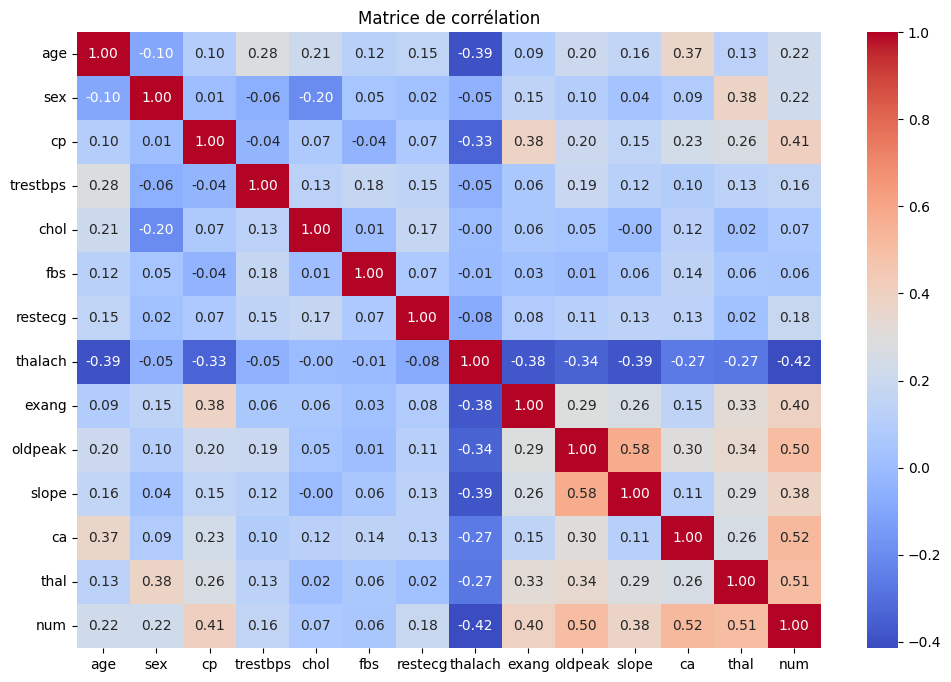

In [ ]:
#Corrélations entre les variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Matrice de corrélation
corr_matrix = df.corr(numeric_only=True)
# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

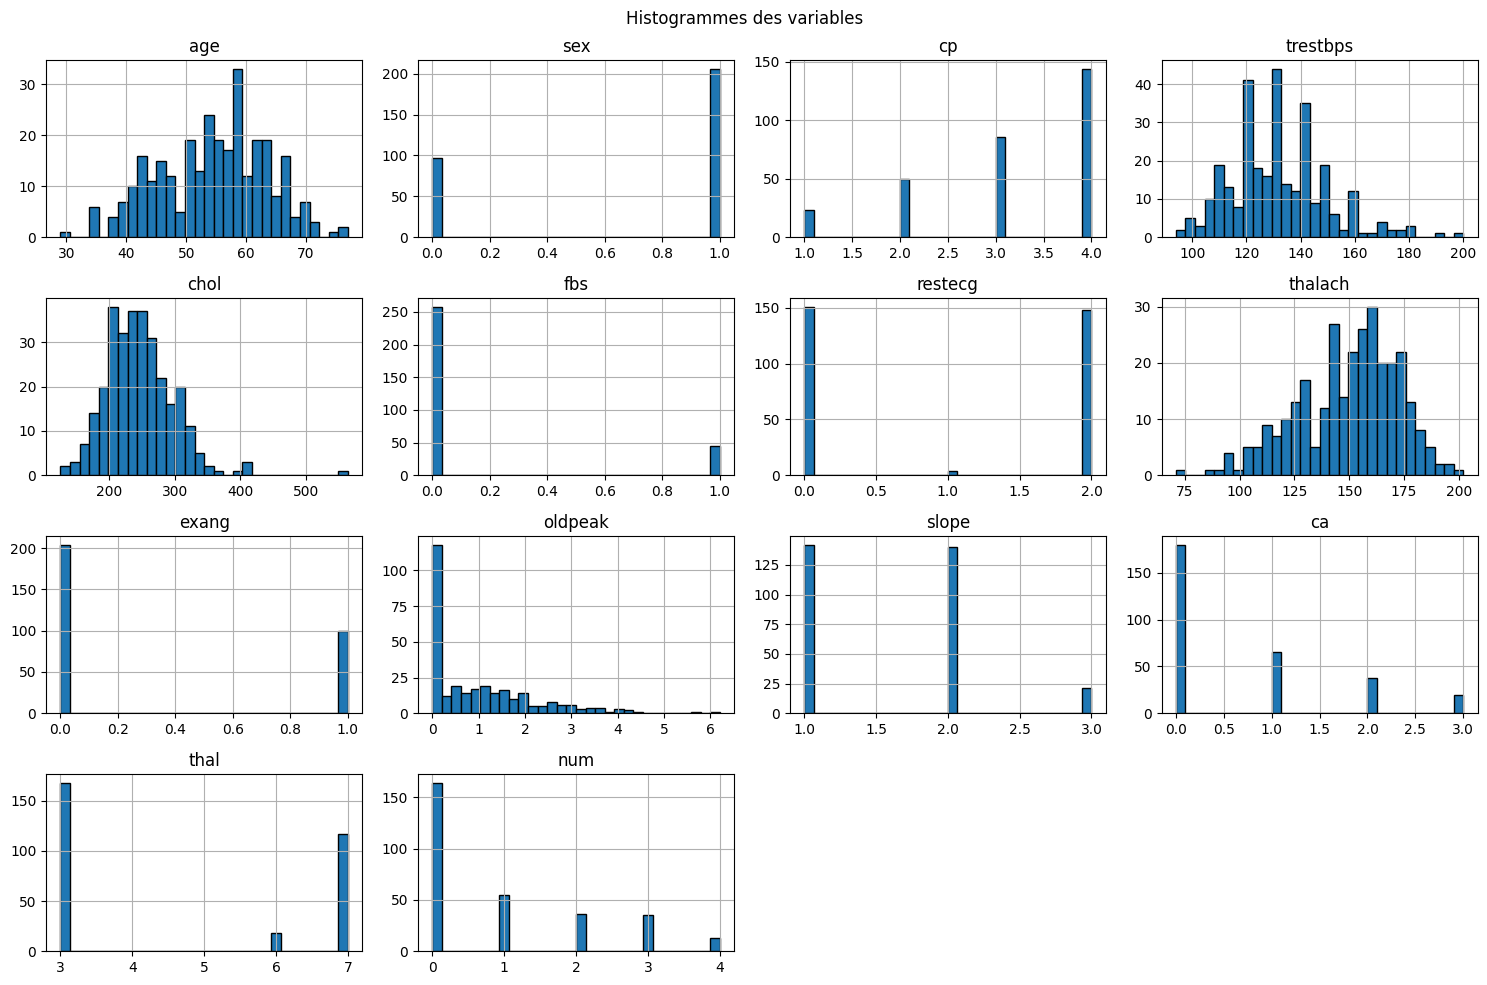

In [23]:

# Histogrammes pour chaque variable numérique
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogrammes des variables")
plt.tight_layout()
plt.show()


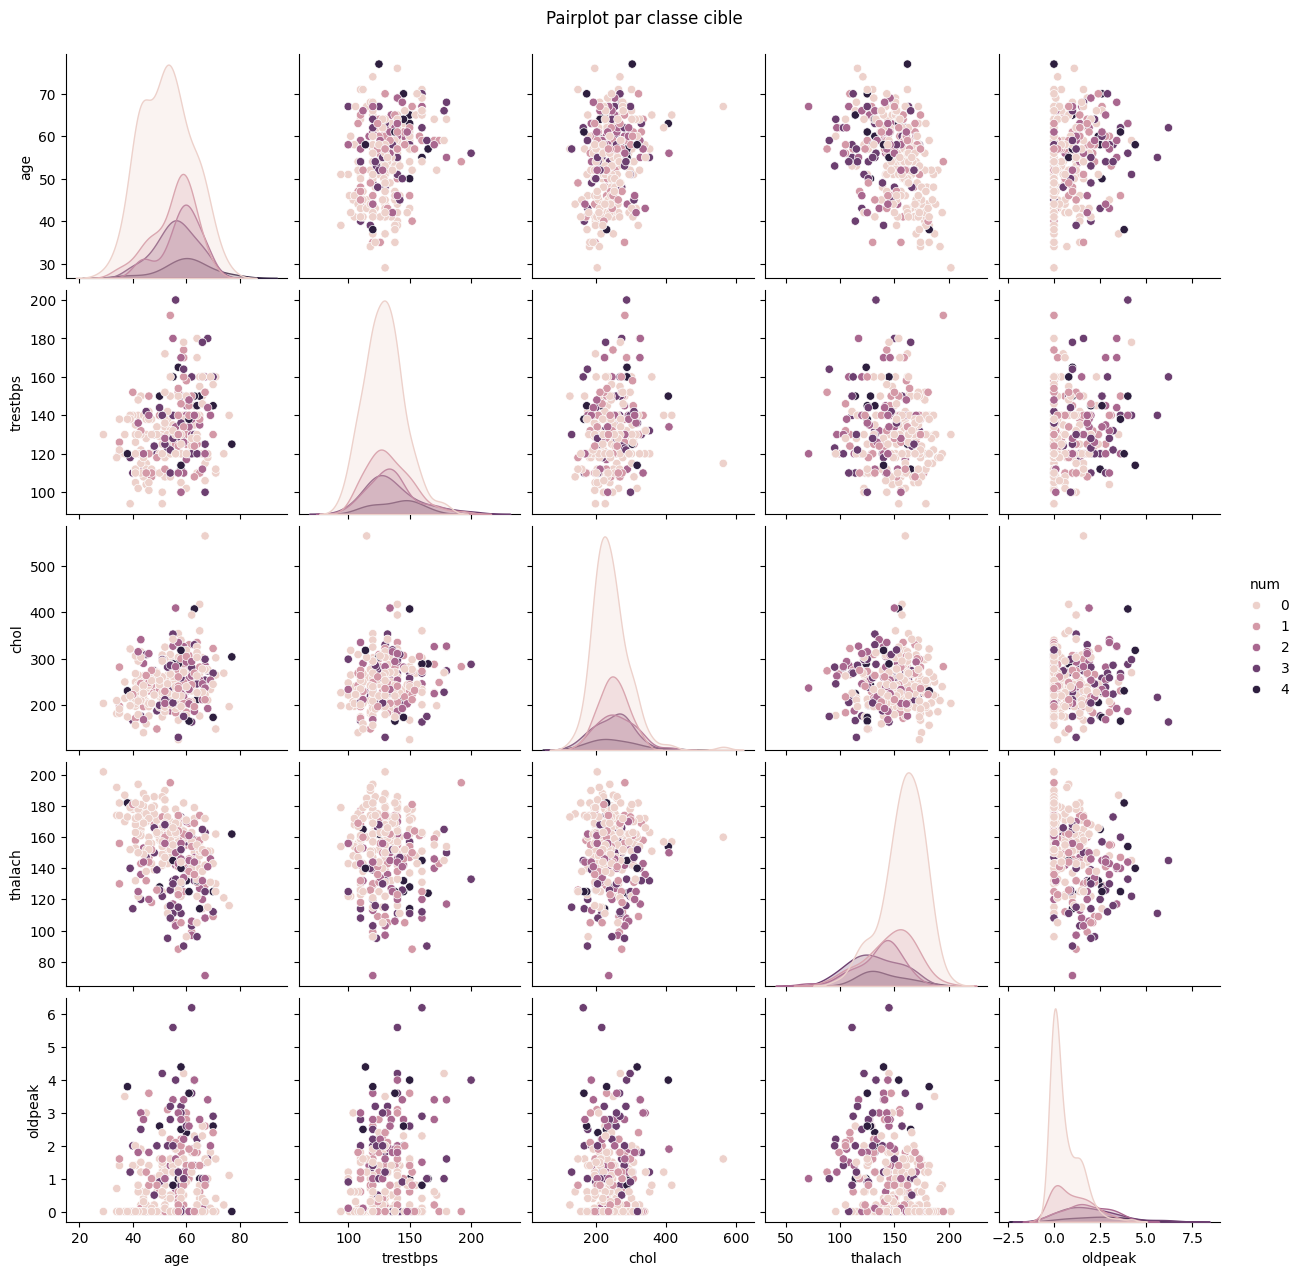

In [25]:
# Pairplot coloré selon la classe cible 'num'
sns.pairplot(df, hue="num", vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.suptitle("Pairplot par classe cible", y=1.02)
plt.show()

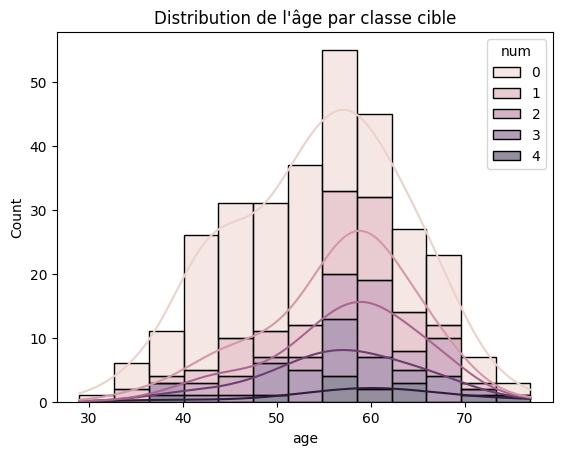

In [26]:
#Distribution des variables par classe cible (num)
sns.histplot(data=df, x='age', hue='num', kde=True, multiple="stack")
plt.title("Distribution de l'âge par classe cible")
plt.show()


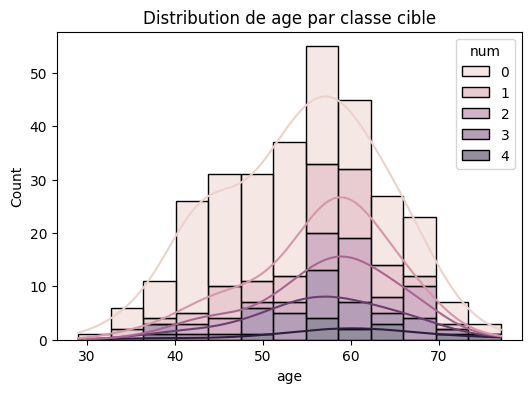

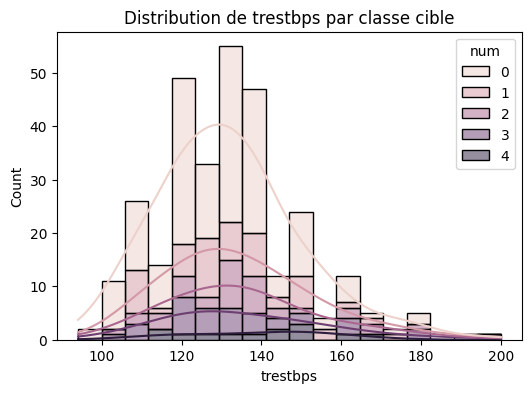

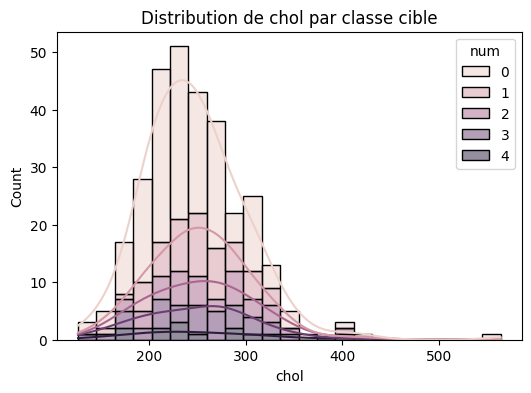

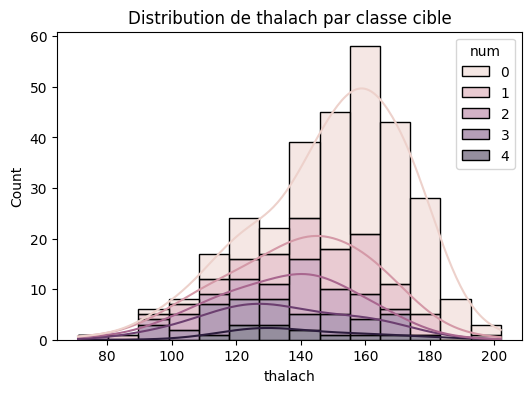

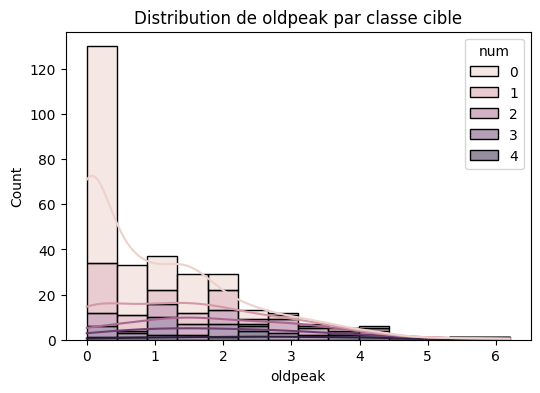

In [27]:
# Liste des variables à analyser
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='num', kde=True, multiple="stack")
    plt.title(f"Distribution de {feature} par classe cible")
    plt.show()

Régression Logistique + Random Forest

Dans ce projet, nous avons choisi la régression logistique comme modèle principal pour sa simplicité, 
son efficacité dans la classification binaire, et surtout sa capacité à fournir des probabilités interprétables, 
ce qui est essentiel en contexte médical. 
Nous avons également testé Random Forest pour améliorer les performances prédictives,
 notamment en capturant des relations non linéaires entre les variables cliniques.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
# Génération d'un jeu de données simulé (1000 exemples)
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'age': np.random.randint(29, 77, size=n_samples),
    'sex': np.random.randint(0, 2, size=n_samples),
    'cp': np.random.randint(0, 4, size=n_samples),
    'trestbps': np.random.randint(90, 180, size=n_samples),
    'chol': np.random.randint(150, 300, size=n_samples),
    'fbs': np.random.randint(0, 2, size=n_samples),
    'restecg': np.random.randint(0, 3, size=n_samples),
    'thalach': np.random.randint(70, 210, size=n_samples),
    'exang': np.random.randint(0, 2, size=n_samples),
    'oldpeak': np.random.uniform(0.0, 6.0, size=n_samples),
    'slope': np.random.randint(0, 3, size=n_samples),
    'ca': np.random.randint(0, 4, size=n_samples),
    'thal': np.random.randint(0, 3, size=n_samples),
    'num': np.random.randint(0, 2, size=n_samples)  # 0 = non, 1 = oui
})

# Séparation des features et de la cible
X = df.drop('num', axis=1)
y = df['num']

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




In [17]:

 # Régression Logistique

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]


# Courbe ROC 
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

print("=== Régression Logistique ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_log))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report :\n", classification_report(y_test, y_pred_log))


=== Régression Logistique ===
Accuracy : 0.445
ROC AUC  : 0.43498746867167926
Confusion Matrix :
 [[30 65]
 [46 59]]
Classification Report :
               precision    recall  f1-score   support

           0       0.39      0.32      0.35        95
           1       0.48      0.56      0.52       105

    accuracy                           0.45       200
   macro avg       0.44      0.44      0.43       200
weighted avg       0.44      0.45      0.44       200




=== Random Forest ===
Accuracy : 0.47
ROC AUC  : 0.4641102756892231
Confusion Matrix :
 [[39 56]
 [50 55]]
Classification Report :
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        95
           1       0.50      0.52      0.51       105

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



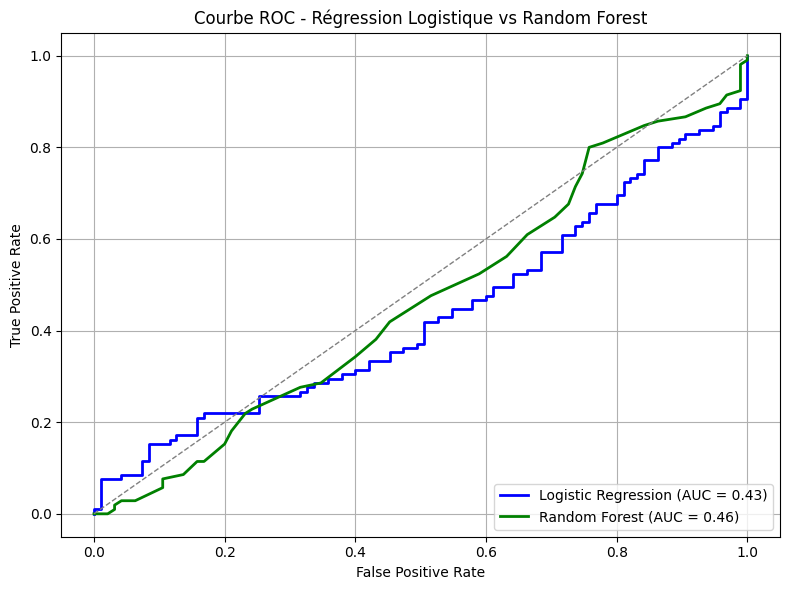

In [ ]:


#  Random Forest


# Entraînement des modèles
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_prob_log = logreg.predict_proba(X_test)[:, 1]



rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Courbe ROC 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report :\n", classification_report(y_test, y_pred_rf))

# Tracé des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Régression Logistique vs Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


IMpprtance des variables selon Random Forest

C:\Users\kapna\AppData\Local\Temp\ipykernel_22540\2810148533.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


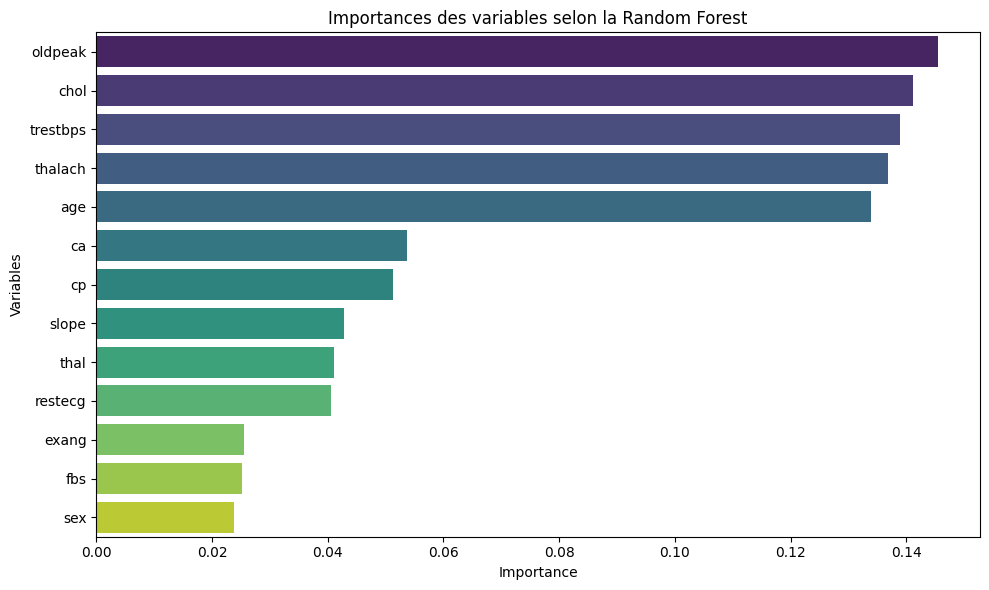

In [ ]:
import seaborn as sns

# Récupération des importances des variables
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Affichage des importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Importances des variables selon la Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()
